## ラズパイマウスのセンサが壁を検出するときのシミュレーション

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [177]:
class Wall:
    def __init__(self, x, y, r):
        self.angle = r
        self.x = x
        self.y = y
        
    def draw(self):
        x1 = self.x
        y1 = self.y
        L = 20
        x0 = x1 - L * math.cos(-1 * self.angle * np.pi / 180.0)
        y0 = y1 - L * math.sin(-1 * self.angle * np.pi / 180.0)
        x2 = x1 + L * math.cos(-1 * self.angle * np.pi / 180.0)
        y2 = y1 + L * math.sin(-1 * self.angle * np.pi / 180.0)
        plt.plot([x0, x2], [y0, y2], 'k-')
        plt.hlines(y=y1, xmin=-20, xmax=20, colors='green', linestyles='dashed', linewidths=1)

In [178]:
sensor_posi = [2.0, 4.0, 55]
marker_posi1 = [0, 0, 0]
marker_posi2 = [0, 20, 30]
a = 2.0 # マーカの一辺の半分

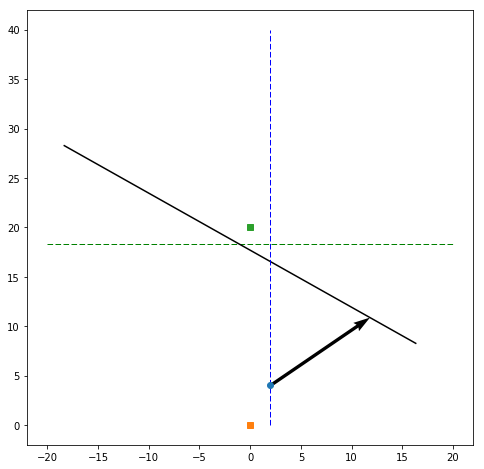

In [180]:
# 計算
x1 = sensor_posi[0] - marker_posi1[0]
y1 = sensor_posi[1] - marker_posi1[1]
x2 = marker_posi2[0] - x1
y2 = marker_posi2[1] - y1
theta1 = marker_posi2[2] - marker_posi1[2]
p = x2-a*math.sin(theta1*np.pi/180.0)
q = y2-a*math.cos(theta1*np.pi/180.0)
theta2 = math.atan2(q, p)*180.0/np.pi
s = math.sqrt(p*p + q*q)
d = s * math.sin((theta1+theta2)*np.pi/180.0)
L = d / math.sin((90+theta1-sensor_posi[2])*np.pi/180.0)

plt.figure(figsize=(8, 8))
# 壁
wall = Wall(marker_posi2[0]-a*math.sin(theta1*np.pi/180.0), marker_posi2[1]-a*math.cos(theta1*np.pi/180.0), marker_posi2[2])
wall.draw()
plt.plot([sensor_posi[0], sensor_posi[0]], [0.0, 40.0], color='blue', linestyle='dashed', linewidth=1)
# マーカとセンサの点
plt.plot(sensor_posi[0], sensor_posi[1], 'o')
plt.plot(marker_posi1[0], marker_posi1[1], 's')
plt.plot(marker_posi2[0], marker_posi2[1], 's')
# センサ表示
u = L*math.cos((90-sensor_posi[2]) * np.pi / 180.0)
v = L*math.sin((90-sensor_posi[2]) * np.pi / 180.0)
plt.quiver(x1,y1, u, v,angles='xy',scale_units='xy',scale=1)

In [133]:
L

4.171572875253809

注意点

このJupyter notebook上では壁の置き方が間違っていることに気付くまでに時間がかかった

最初、壁が回転するときに壁の中心で回転させていたが
マーカを基準に回転させる必要があった

絶対座標系を気にする